**Task-02**

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Sample Dataset :- https://www.kaggle.com/c/titanic/data

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#to ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

**1. Loading the Data :**

In [47]:
data = pd.read_csv("train.csv")

**2. Exploring the Data :**

In [48]:
data.shape

(891, 12)

There are 891 observations & 12 variables 

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Dictionnary**

Survived: 0 = no, 1 = yes

Pclass: Ticket class: 1 = First class, 2 = Second class, 3 = Third class. Considered as a proxy for socio-economic status (upper, middle, lower).

Sex: Male or female

Age: Age in years, fractional if less than 1, If the age is estimated, is it in the form of xx.5

SibSp: Number of siblings or spouses aboard the titanic

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: Number of parents or children aboard the titanic

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

Ticket: Passenger ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Point of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

In [52]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
(data.isnull().sum()/len(data))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

20 percent of the Age data is missing, small enough to be imputated somehow or delete rows. Whereas the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level, better to drop it or if it'll stay, it will be more relevant if it informs wether the cabin is known or not.

**3. Data Cleaning :**

We decide to fill in missing age data. So we check the average age by passenger class :

<Axes: xlabel='Pclass', ylabel='Age'>

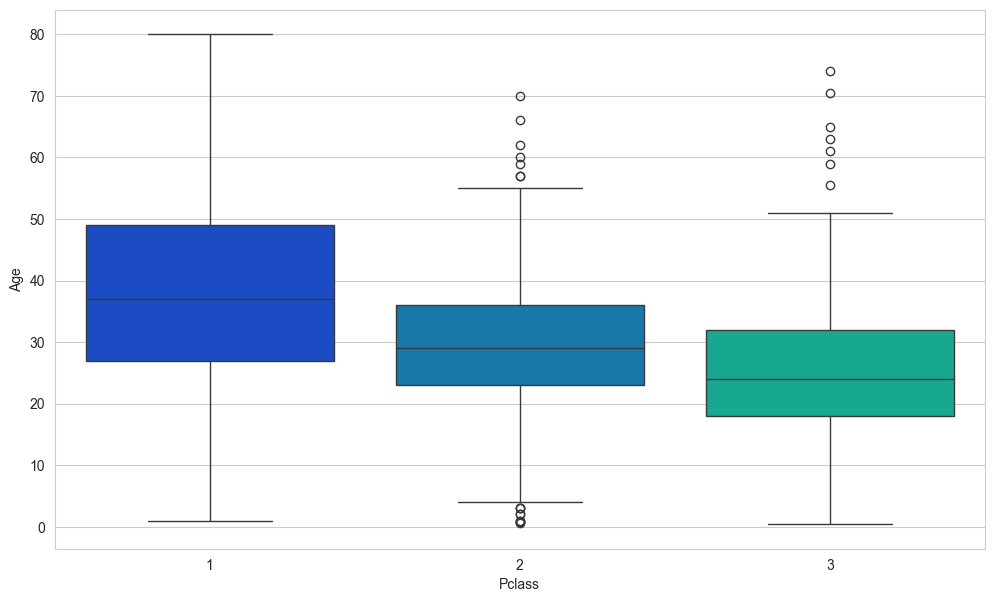

In [54]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

The wealthier passengers in the higher classes tend to be older, which makes sense. 

We'll use these average age values to impute based on Pclass for Age.

In [55]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [56]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

For **Cabin** column, we'll just drop it :

In [57]:
data.drop('Cabin',axis=1,inplace=True)

For **Embarked** column, we'll drop the rows where it's null; their % is so small that they can be ignored :

In [58]:
data.dropna(inplace=True)

**4. Data Visualization :**

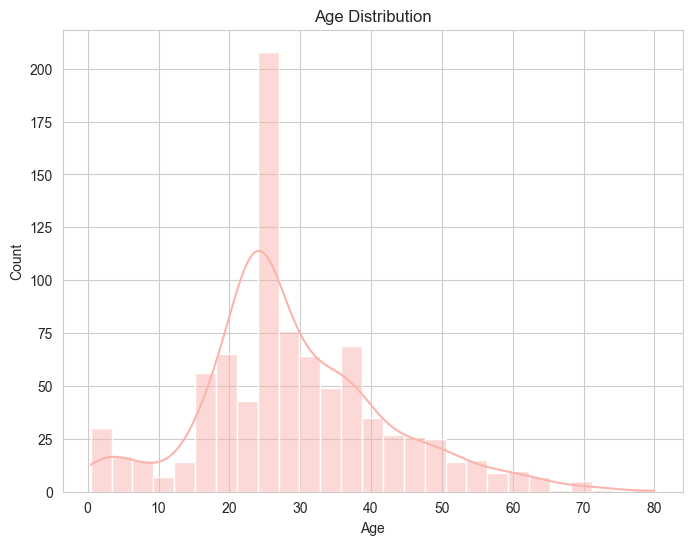

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

From visual inspection, we can see that the age that has the highest frequency is around ~28, followed by the mid-twenties, then early twenties. Overall, the Titanic seemed to have a large frequency of people in their 20s and 30s (right skexed data).

<Axes: xlabel='Survived', ylabel='count'>

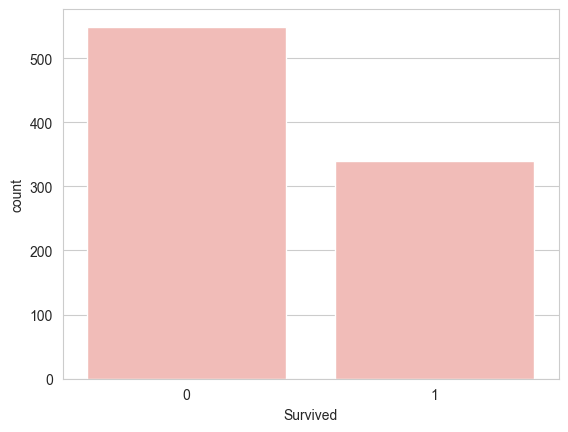

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Survived', ylabel='count'>

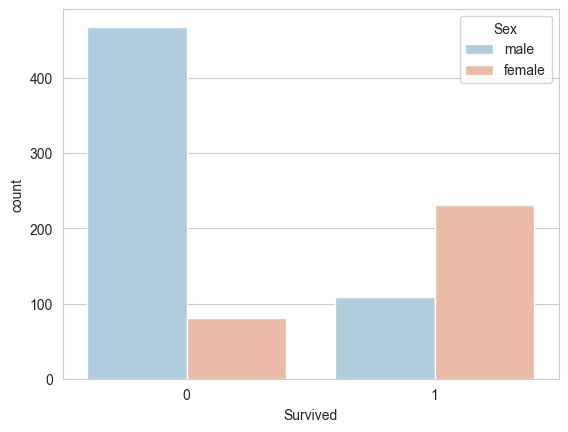

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

From visual inspection, it seems that females tended to have a higher survival rate than males.

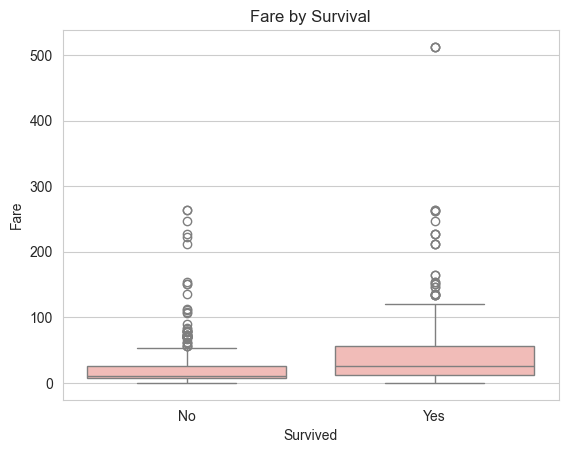

Correlation between fare & survival : 0.2552904613046991


In [62]:
plt.figure(facecolor='white')
sns.boxplot(data=data, x='Survived', y='Fare')
plt.title('Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

correl = data['Fare'].corr(data['Survived'])
print(f"Correlation between fare & survival : {correl}")

Based on the created visualization (median fare for survivors is higher than one for non survivors) and the weak correlation coefficient, we can see that there is a weak correlation between fare and survival rate. This suggests that people who tended to pay higher fares, may have had a slightly higher tendency to survive.

<Axes: xlabel='Survived', ylabel='count'>

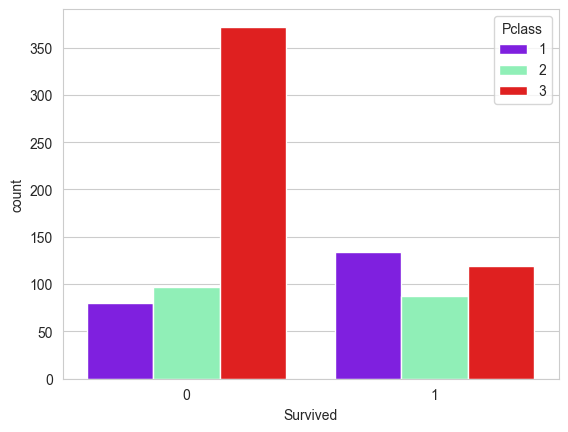

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

Overall, it seems that thoose from 1st class tend to have higher survival rate than thoose from lower classes -- cruel world !